In [1]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

In [2]:
My_table = soup.find('table',{'class':'wikitable sortable'})

In [3]:
A=[]
B=[]
C=[]
for row in My_table.find_all('tr'):
    i=0
    for cell in row.find_all('td'):
        if i==0:
            A.append(cell.text)
            i=i+1
        elif i==1:
            B.append(cell.text)
            i=i+1
        elif i==2:
            C.append(cell.text.replace("\n", ""))

In [4]:
for j in range(0,len(B)):
    if C[j]=="Not assigned":
        C[j]=B[j]

In [5]:
from pandas import DataFrame
Data= {'PostalCode': A, 'Borough':B, 'Neighborhood':C}
df= DataFrame(Data)

In [6]:
df2=df[df.Borough != 'Not assigned']

In [7]:
df3=df2.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(','.join).reset_index()
df3.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [8]:
import pandas as pd
path = "http://cocl.us/Geospatial_data"
dfG = pd.read_csv(path)
dfG1=dfG.drop(['Postal Code'], axis=1)

In [9]:
result = pd.concat([df3, dfG1], axis=1, sort=False)
result.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [11]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
print('Libraries imported.')

Libraries imported.


In [24]:
address = 'Toronto'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronnto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronnto are 43.653963, -79.387207.


In [35]:

toronto_clustering = result.drop('Neighborhood', 1)
toronto_clustering1 = toronto_clustering.drop('Borough', 1)
toronto_clustering2 = toronto_clustering1.drop('PostalCode', 1)

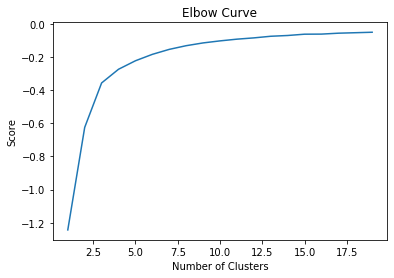

In [34]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(toronto_clustering2).score(toronto_clustering2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

A good k could be 4 or 5

In [77]:
kclusters=5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering2)
kmeans.labels_[0:10] 
centroids = kmeans.cluster_centers_
print(centroids)

[[ 43.77480817 -79.24566825]
 [ 43.68279116 -79.53037109]
 [ 43.70021343 -79.32439325]
 [ 43.66240221 -79.39927215]
 [ 43.75057744 -79.41419236]]


In [106]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
import matplotlib.pyplot as plt
import pandas as pd
# Predicting the clusters
x=toronto_clustering2['Latitude'].values
y=toronto_clustering2['Longitude'].values
X=np.array(list(zip(x,y)))
labels = kmeans.predict(X)
L=pd.DataFrame({'Labels': labels})
toronto_clustering3=pd.concat([toronto_clustering2, L], axis=1)
centroids = kmeans.cluster_centers_# Getting the cluster centers
#colors=['red','green','blue','cyan','yellow']

x1 = np.arange(kclusters)
ys = [i + x1 + (i*x1)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lon, cluster in zip(toronto_clustering3['Latitude'], toronto_clustering3['Longitude'], toronto_clustering3['Labels']):
    label = folium.Popup('Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

Libraries imported.
